# Intoduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [3]:
df=pd.read_csv("train (1).csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
df['Age'].mean()

29.69911764705882

## Outlier Detection

<Axes: >

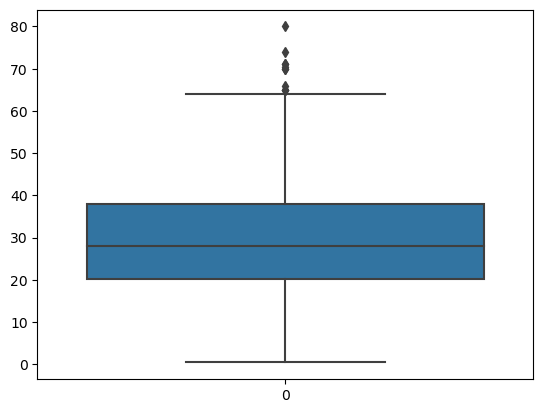

In [14]:
sns.boxplot(df['Age'])

In [15]:
df=df[df['Age']<=65]

<Axes: >

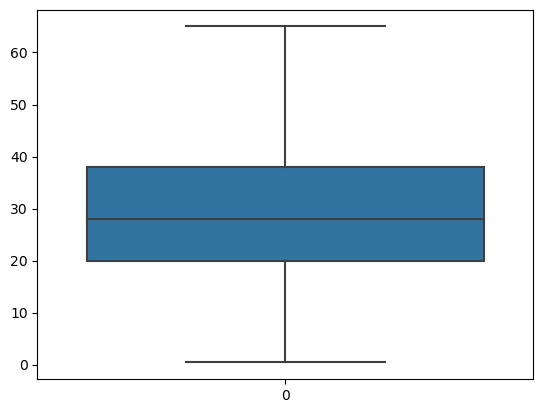

In [16]:
sns.boxplot(df['Age'])

In [17]:
df['Age'].mean()

29.224745042492916

In [18]:
df['Age'].fillna(df['Age'].mean().round(0))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 706, dtype: float64

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df['Embarked'].value_counts()

S    549
C    128
Q     27
Name: Embarked, dtype: int64

In [21]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [22]:
df['Embarked'].fillna('S',inplace=True)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df['SibSp'].value_counts()

0    464
1    182
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

In [25]:
df['Parch'].value_counts()

0    514
1    109
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
df['Sex']=le.fit_transform(df['Sex'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [30]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [32]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [39]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,706.00,706.00,706.00,706.00,706.00,706.00,706.00,706.00,706.00
mean,448.50,0.41,2.24,0.63,29.22,0.52,0.43,34.77,1.60
std,258.56,0.49,0.84,0.48,13.90,0.93,0.86,53.16,0.78
min,1.00,0.00,1.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,0.00,1.00,0.00,20.00,0.00,0.00,8.05,2.00
50%,443.50,0.00,2.50,1.00,28.00,0.00,0.00,15.74,2.00
75%,677.75,1.00,3.00,1.00,38.00,1.00,1.00,33.00,2.00
max,891.00,1.00,3.00,1.00,65.00,5.00,6.00,512.33,2.00


# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

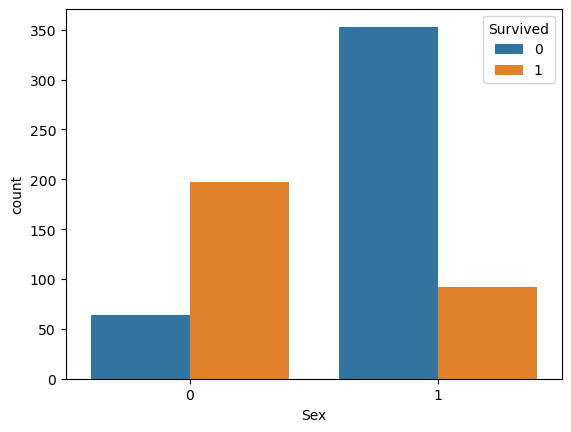

In [34]:
sns.countplot(data=df,x='Sex',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

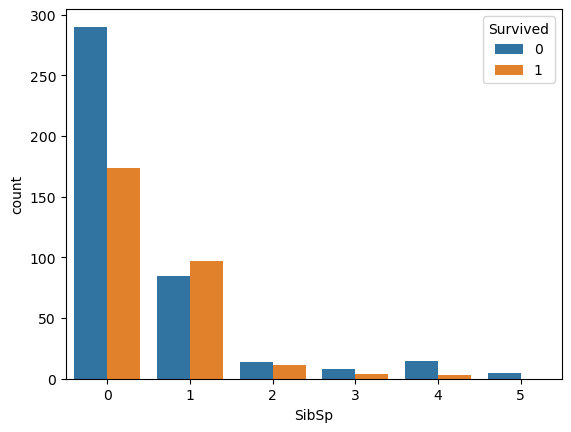

In [35]:

sns.countplot(data=df,x='SibSp',hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

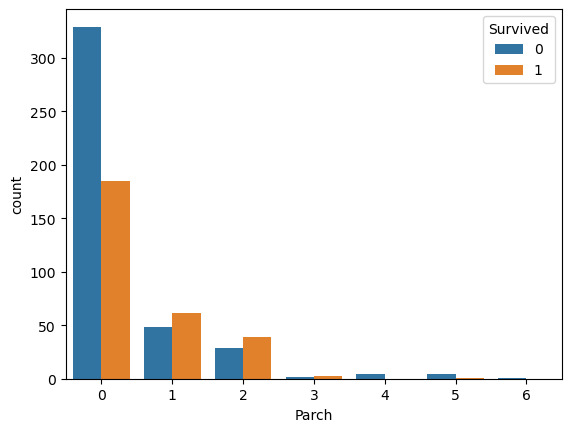

In [36]:
sns.countplot(data=df,x='Parch',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

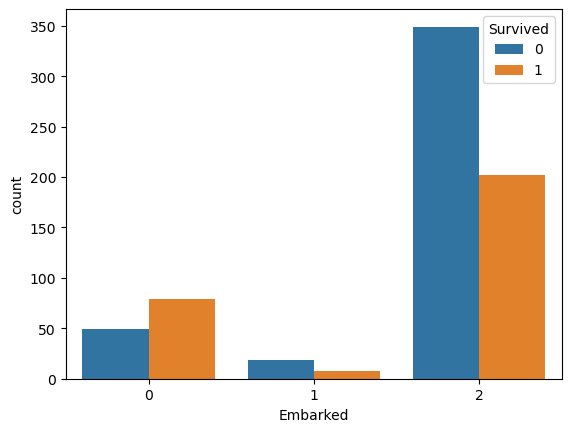

In [37]:
sns.countplot(data=df,x='Embarked',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

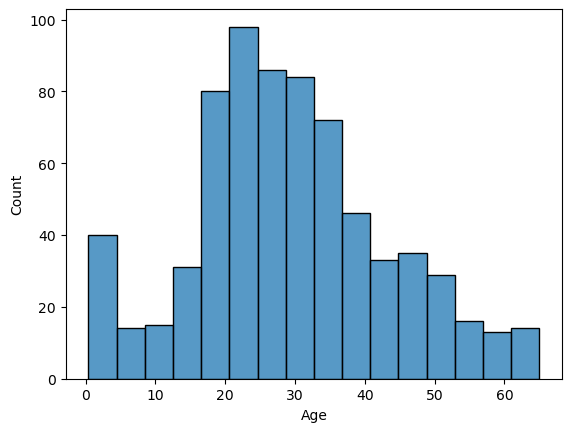

In [42]:
sns.histplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

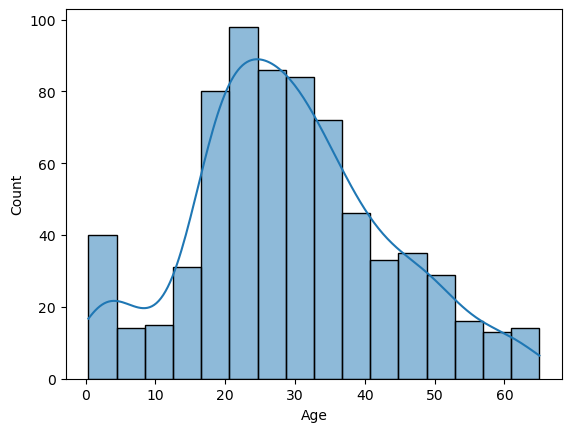

In [43]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

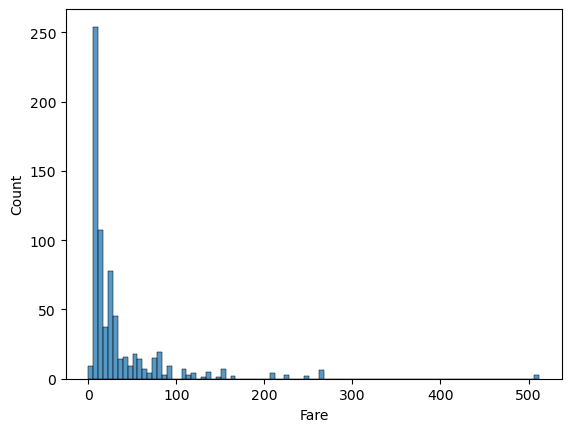

In [46]:
sns.histplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

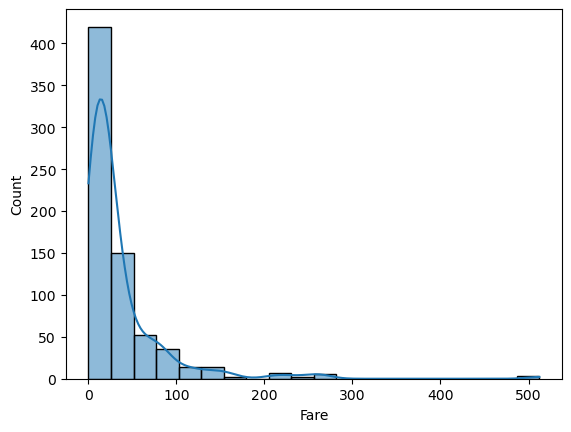

In [48]:
sns.histplot(df['Fare'],bins=20,kde=True)

In [57]:
df['Sex'].value_counts()

1    445
0    261
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x203c92621d0>,
 [Text(-0.43785074604698265, 1.0091019394422454, '1'),
  Text(0.43785074604698293, -1.0091019394422451, '0')],
 [Text(-0.2388276796619905, 0.5504192396957701, '63.0%'),
  Text(0.23882767966199067, -0.55041923969577, '37.0%')])

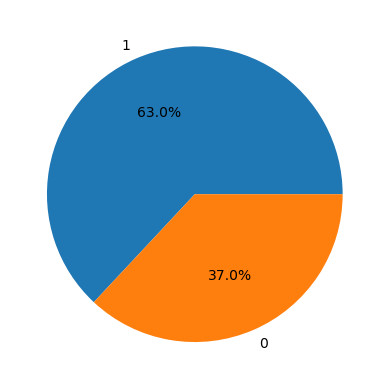

In [58]:
l1=df['Sex'].value_counts()
l2=df['Sex'].value_counts().keys()
plt.pie(l1,labels=l2,autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x203c923cfd0>,
 [Text(-0.8485621494845557, 0.6999587691158321, '2'),
  Text(0.7585500175940837, -0.7966190248845526, '0'),
  Text(1.0920702793008457, -0.13184272853583276, '1')],
 [Text(-0.4628520815370303, 0.38179569224499926, '78.0%'),
  Text(0.4137545550513183, -0.43451946811884684, '18.1%'),
  Text(0.5956746978004611, -0.07191421556499968, '3.8%')])

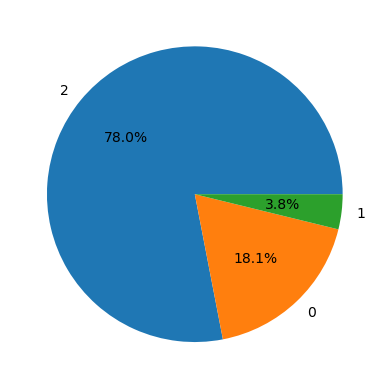

In [59]:
l3=df['Embarked'].value_counts()
l4=df['Embarked'].value_counts().keys()
plt.pie(l3,labels=l4,autopct='%1.1f%%')


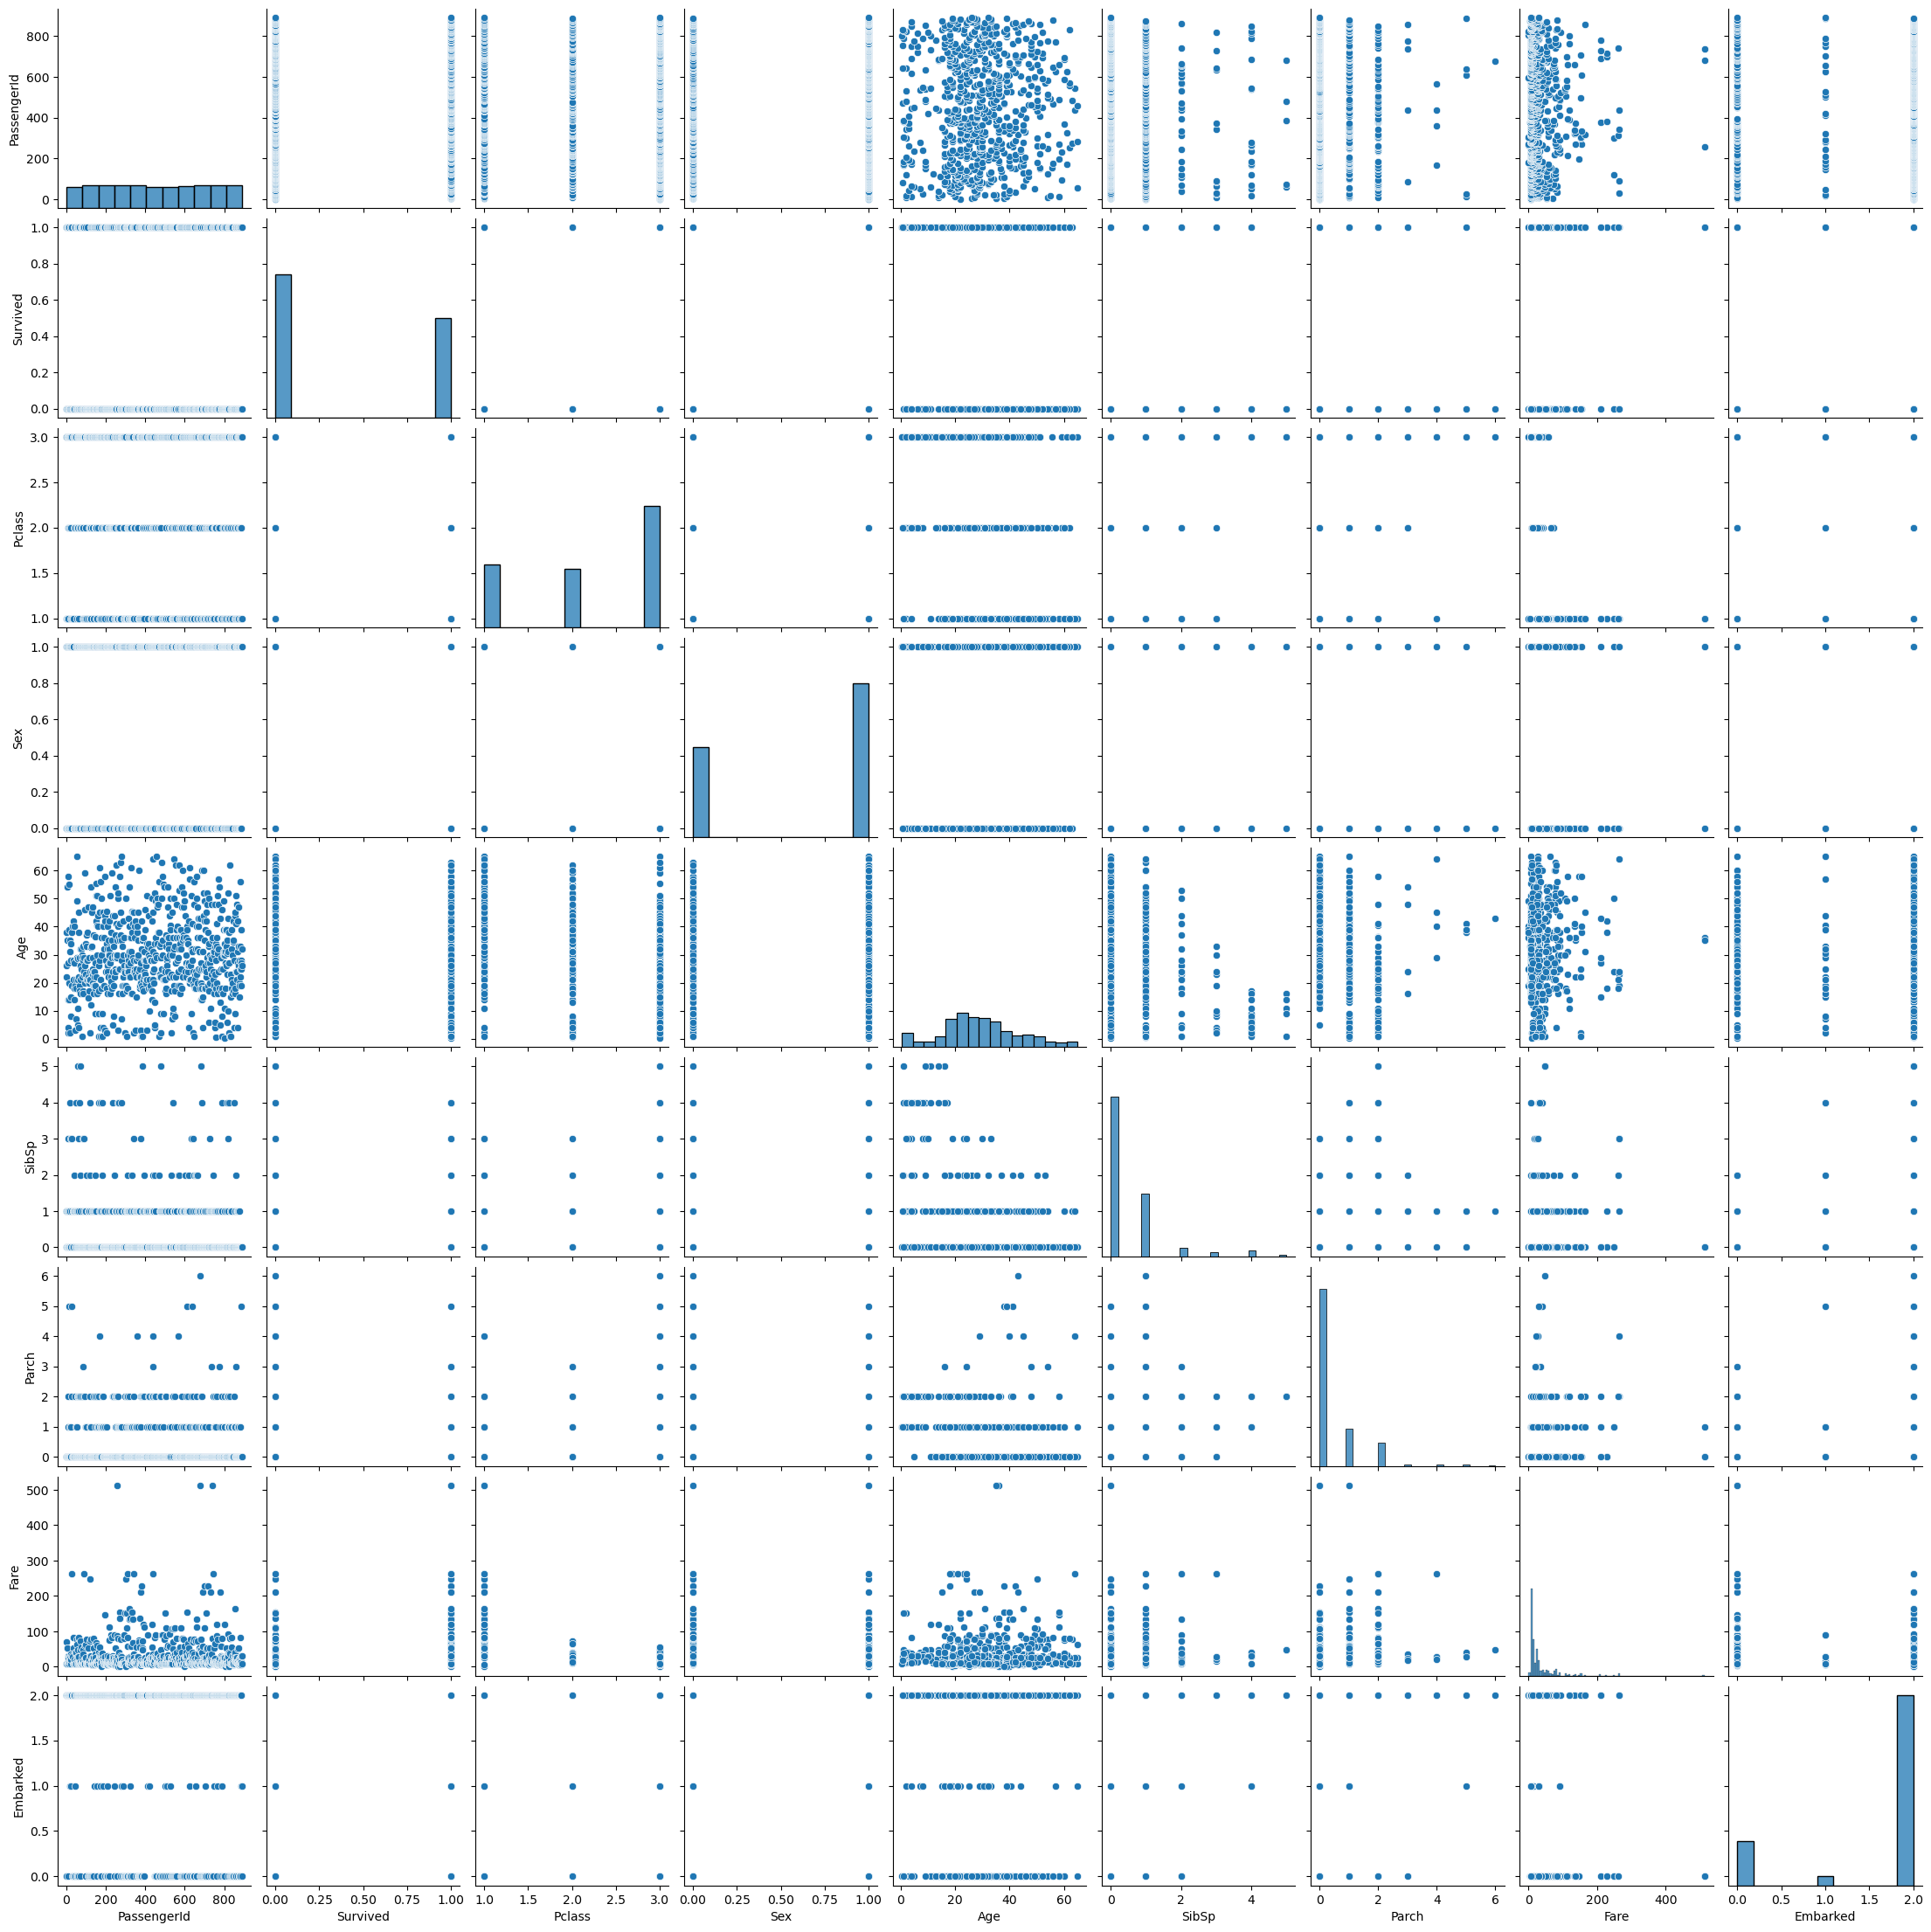

In [49]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Fare'>

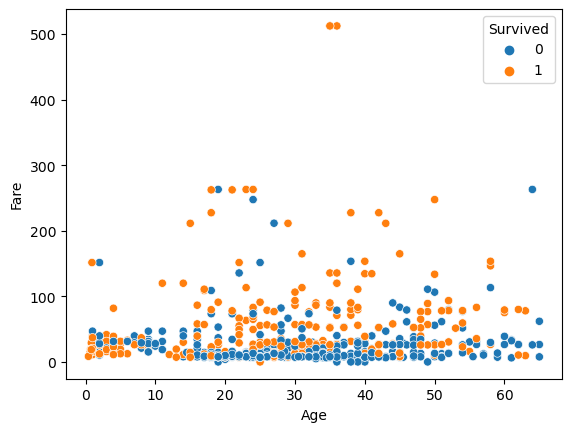

In [61]:
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Survived'])

<Axes: xlabel='Age', ylabel='Fare'>

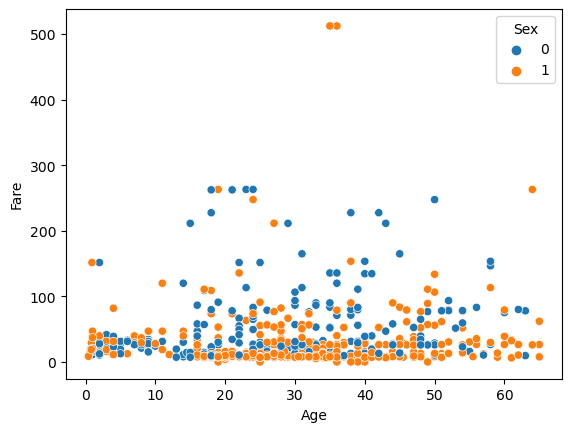

In [62]:
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Sex'])

In [63]:
corr=df.corr()

<Axes: >

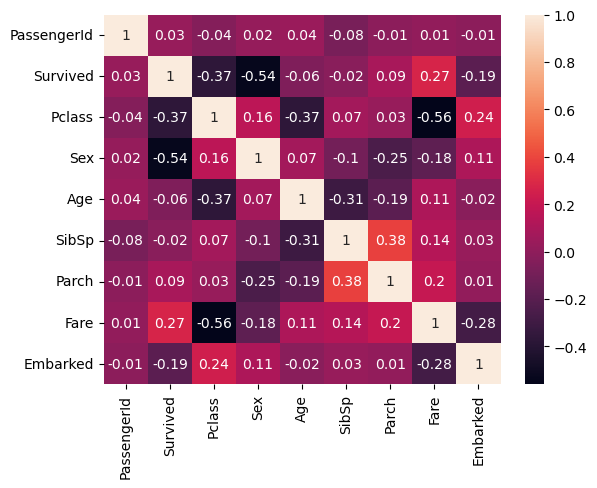

In [67]:
sns.heatmap(corr.round(2),annot=True)

# Feature Engineering

In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [69]:
from sklearn.model_selection import train_test_split

In [72]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
x.shape

(706, 8)

In [74]:
x_train.shape

(564, 8)

In [75]:
x_test.shape

(142, 8)

In [76]:
y_train.shape

(564,)

In [77]:
y_test.shape

(142,)

# Model Building

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
le=LinearRegression()

In [81]:
le.fit(x_train,y_train)

LinearRegression()

In [82]:
le.score(x_test,y_test)

0.37510230018658863

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
re=RandomForestClassifier()

In [89]:
re.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
re.score(x_test,y_test)

0.795774647887324

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
de=DecisionTreeClassifier()

In [93]:
de.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
de.score(x_test,y_test)

0.6830985915492958

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
ms=MinMaxScaler()

In [97]:
x_train=ms.fit_transform(x_train)
x_test=ms.fit_transform(x_test)

In [98]:
re2=RandomForestClassifier()

In [99]:
re2.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
re2.score(x_test,y_test)

0.7887323943661971

So RandomForestClassifier's are the best module of this dataset

In [101]:
pred=re.predict(x_test)

c:\Users\jaya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [102]:
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [103]:
df2=pd.read_csv('test.csv')

In [104]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
df2.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [108]:
df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
Le=LabelEncoder()

In [111]:
df2['Sex']=Le.fit_transform(df2['Sex'])

In [112]:
df2['Embarked']=Le.fit_transform(df2['Embarked'])

In [113]:
df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [114]:
df2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [116]:
df2['Age'].mean().round(0)

30.0

In [121]:
df2['Age'].fillna(df2['Age'].mean().round(0),inplace=True)

In [122]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [123]:
df2['Fare'].mean()

35.627188489208635

In [124]:
df2['Fare'].fillna(df2['Fare'].mean().round(0),inplace=True)

In [125]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [126]:
df2.shape

(418, 8)

In [127]:
pred1=re.predict(df2)

In [128]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,